# Feature Engineering

“Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracyonunseen data.”

Let’s look at why we need feature engineering and how can it be an advantage for us when we are building Machine Learning models and working with data.

* Better representation of data: Features are basically various representations of the underlying raw data. These representations can be better understood by Machine Learning algorithms. Besides this, we can also often easily visualize these representations. A simple example would be to visualize the frequent word occurrences of a newspaper article as opposed to being totally perplexed as to what to do with the raw text!
* Better performing models: The right features tend to give models that outperform other models no matter how complex the algorithm is. In general if you have the right feature set, even a simple model will perform well and give desired results. In short, better features make better models.
* Essential for model building and evaluation: We have mentioned this numerous times by now, raw data cannot be used to build Machine Learning models. Get your data, extract features, and start building models! Also on evaluating model performance and tuning the models, you can reiterate over your feature set to choose the right set of features to get the best model.
* More flexibility on data types: While is it definitely easier to use numeric data types directly with Machine Learning algorithms with little or no data transformations, the real challenge is to build models on more complex data types like text, images, and even videos. Feature engineering helps us build models on diverse data types by applying necessary transformations and enables us to work even on complex unstructured data.
* Emphasis on the business and domain: Data scientists and analysts are usually busy in processing, cleaning data and building models as a part of their day to day tasks. This often creates a gap between the business stakeholders and the technical/ analytics team. Feature engineering involves and enables data scientists to take a step back and try to understand the domain and the business better, by taking valuable inputs from the business and subject matter experts. This is necessary to create and select features that might be useful for building the right model to solve the problem. Pure statistical and mathematical knowledge is rarely sufficient to solve a complex real-world problem. Hence feature engineering emphasizes to focus on the business and the domain of the problem when building features.

This list, though not an exhaustive one, gives us a pretty good insight into the importance of feature engineering and how it is an essential aspect of building Machine Learning models. The importance of the problem to be solved and the domain is also pretty important in feature engineering.

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

### Values
Usually, scalar values in their raw form indicate a specific measurement, metric, or observation belonging to a specific variable or field. The sematics of the field is usually obtianed form the field name itself or a data dictionary if present.

In [2]:
df_poke = pd.read_csv('data/pokemon.csv', encoding='utf-8')
df_poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


There are several attributes there which represent numeric values which can be used directly.

In [3]:
df_poke[['HP','Attack','Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


### Counts
Raw numeric measures can also indicate counts, frequencies and occurences of specific attributes. Let's look a sample of data from the million-song dataset, which depicts counts or frequencies of songs that have been heard by various users.

In [4]:
df_popsong = pd.read_csv('data/song_views.csv', encoding='utf-8')

df_popsong.head()

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0


### Binarization
Oftern raw numeric frequencies or counts are not necessary in building models especially with regard to methods applied to building recommender engines. For example if I want to know if a person is iterested or has listened to a particular song, I do not need to know the total numer of time he/she has listened to the same song. I am more concerned about the various songs he/she has listened to. In this case, a binary feature is preferred as opposed to a count based feature. We can bianre our `listen_count` in two ways: 

In [5]:
watched = np.array(df_popsong['listen_count'])
watched[watched >= 1] = 1
df_popsong['watched'] = watched

In [6]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([df_popsong['listen_count']])[0]
df_popsong['pd_watched'] = pd_watched
df_popsong.head(10)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


### Rounding
Often when dealing wiht numeric attributes like proportions or percentages, we may not need values with a high amount of precision. Hence it makes sense to round off these high precision percentages into numeric integers. These integers can then be directly used as raw numeric values or even as categorical features.

In [7]:
items_popularity = pd.read_csv('data/item_popularity.csv', encoding='utf-8')
# rounding off percentages
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


### Interactions
A model is usually built in such a way that we try to model the output responses (dicrete or continuous) as a function of the input feature varaibles. For example, a simple linear regression equation can be depicted as $y = c_1x_1 + c_2x_2 + ... + c_nx_n$. This simple linear model depicts the relationsip between the output and inputs, purely based on the individual, separate input features.

However, often in serveral real-world datasets and scenarios, it makes sense to also try to capture the interactions between these feature variables as a part of the input feature set. A simple depiction of the e-nxxtension of the above linear regression formaultion with interaction features would be $y = c_1x_! + c_2x_2 + ... + c_nx_n + c_{11}x_1^2 + c_{22}x_1x_2 + c_{12}x_1x_2 + ...$ where features like ${x_1x_2,x_1^2,...}$ denote the interatction features. Let's try engineering some features from Pokemon:

In [8]:
atk_def = df_poke[['Attack','Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


We can see in this output, the two numeric features depicting Pokémon attack and defense. The following code helps us build interaction features from these two features. We will build features up to the second degree using the PolynomialFeatures class from scikit-learn's API.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

We can clearly see from this output that we have a total of five features including the new interaction
features. We can see the degree of each feature in the matrix, using the following snippet.

In [10]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


Now that we know what each feature actually represented from the degrees depicted, we can assign a name to each feature as follows to get the updated feature set.

In [11]:
intr_features = pd.DataFrame(res, columns=['Attack','Defense','Attack^2','Attack x Defense', 'Defense^2'])

intr_features.head()

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


The `fit_transform(...)` API function from scikit-learn is useful to build a feature engineering representation object on the training data, which can be reused on new data during model predictions by calling on the `transform(...)` function. Let’s take some sample new observations for Pokémon attack and defense features and try to transform them using this same mechanism.

In [12]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]], columns=['Attack', 'Defense'])

new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res, columns=['Attack','Defense','Attack^2','Attack x Defense', 'Defense^2'])

new_intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


### Binning
Often when working with numeric data, you might come across features or attributes which depict raw measures such as values or frequencies. In many cases, often the distributions of these attributes are skewed in the sense that some sets of values will occur a lot and some will be very rare. Besides that, there is also the added problem of varying range of these values. Suppose we are talking about song or video view counts.

In some cases, the view counts will be abnormally large and in some cases very small. Directly using these features in modeling might cause issues. Metrics like similarity measures, cluster distances, regression coefficients and more might get adversely affected if we use raw numeric features having values which range across multiple orders of magnitude. There are various ways to engineer features from these raw values so we can these issues. These methods include transformations, scaling and binning/quantization.

In this section, we will talk about binning which is also known as quantization. The operation of binning is used for transforming continuous numeric values into discrete ones. These discrete numbers can be thought of as bins into which the raw values or numbers are binned or grouped into. Each bin represents a specific degree of intensity and has a specific range of values which must fall into that bin. There are various ways of binning data which include fixed-width and adaptive binning. Specific techniques can be employed for each binning process. 

In [13]:
df_survey_fcc = pd.read_csv('data/fcc_2016_coder_survey_subset.csv', encoding='utf-8')

df_survey_fcc[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


#### Fixed Width Binning
We have specific fixed widths for each of the bins, which are usually pre-defined by the user analyzing the data. Each bin has a pre-fixed range of values which should be assigned to that bin on the basis of some business or custom logic, rules, or necessary transformations.

Text(0,0.5,'Frequency')

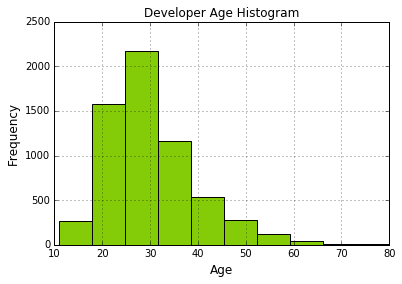

In [14]:
fig, ax = plt.subplots()

df_survey_fcc['Age'].hist(color='#84cc08')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

This shows the developer ages distribtion and is showing right skew, which is expected.

Now let's try to assign these to specific bins like this

0-9 = 1
10-19 = 2
20-29 = 3, etc, etc

In [15]:
df_survey_fcc['Age_bin_round'] = np.array(np.floor(np.array(df_survey_fcc['Age']) / 10.))

df_survey_fcc[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


But what if we want to bin on custom ranges. Let's define some custom ranges as so:

Age Range : Bin

0 - 15 : 1 16 - 30 :2 31 - 45 :3 46 - 60 :4 61 - 75 :5 75 - 100 :6

In [16]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

df_survey_fcc['Age_bin_custom_range'] = pd.cut(np.array(df_survey_fcc['Age']), bins=bin_ranges)
df_survey_fcc['Age_bin_custom_label'] = pd.cut(np.array(df_survey_fcc['Age']),bins=bin_ranges, labels=bin_names)
df_survey_fcc[['ID.x', 'Age', 'Age_bin_round','Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


### Adptive Binning

So far, we have decided the bin width and ranges in fixed-width binning. However, this technique can lead to irregular bins that are not uniform based on the number of data points or values which fall in each bin. Some of the bins might be densely populated and some of them might be sparsely populated or even be empty! Adaptive binning is a safer and better approach where we use the data distribution itself to decide what should be the appropriate bins.

Quantile based binning is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals. Thus, q-Quantiles help in partitioning a numeric attribute into q equal partitions. Popular examples of quantiles include the 2-Quantile known as the median which divides the data distribution into two equal bins, 4-Quantiles known as the quartiles, which divide the data into four equal bins and 10-Quantiles also known as the deciles which create 10 equal width bins.

In [17]:
df_survey_fcc[['ID.x','Age','Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0,0.5,'Frequency')

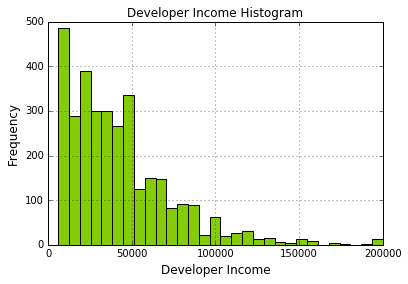

In [18]:
fig, ax = plt.subplots()
df_survey_fcc['Income'].hist(bins=30, color='#84cc08')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

We can see from the distribution depicted above that as expected there is a right skew with lesser developers earning more money and vice versa. Let’s take a 4-Quantile or a quartile based adaptive binning scheme.

In [19]:
quantile_list = [0.0,0.25,0.5,0.75,1.0]
quantiles = df_survey_fcc['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     35000.0
0.75     56000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0,0.5,'Frequency')

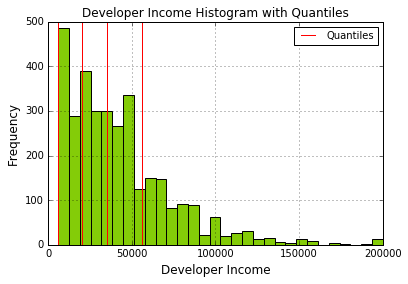

In [20]:
fig, ax = plt.subplots()
df_survey_fcc['Income'].hist(bins=30, color='#84cc08')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
    
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [21]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df_survey_fcc['Income_quantile_range'] = pd.qcut(df_survey_fcc['Income'], q=quantile_list)
df_survey_fcc['Income_quantile_label'] = pd.qcut(df_survey_fcc['Income'], q=quantile_list, labels=quantile_labels)
df_survey_fcc[['ID.x', 'Age', 'Income','Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(35000.0, 56000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 35000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(35000.0, 56000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(56000.0, 200000.0]",75-100Q


## Statistical Transformations

In this section, we will look at the Log transform as well as the Box-Cox transform. Both of these transform functions belong to the Power Transform family of functions. These functions are typically used to create monotonic data transformations, but their main significance is that they help in stabilizing variance, adhering closely to the normal distribution and making the data independent of the mean based on its distribution.

### Log Transformation
The log transform belongs to the power transform family of functions. This function can be defined as $y = log_b(x)$ which reads as $log$ of $x$ to the base $b$ is equal to $y$. This translates to $b^y = x$, which indicates to what power must the base $b$ be raised to in order to get $x$. The natural logarithm uses the base $b = e$
where $e = 2.71828$ popularly known as Euler’s number. You can also use base $b = 10$ used popularly in the decimal system. Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible.

In [22]:
df_survey_fcc['Income_log'] = np.log((1+df_survey_fcc['Income']))
df_survey_fcc[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5,450,'$\\mu$=10.39')

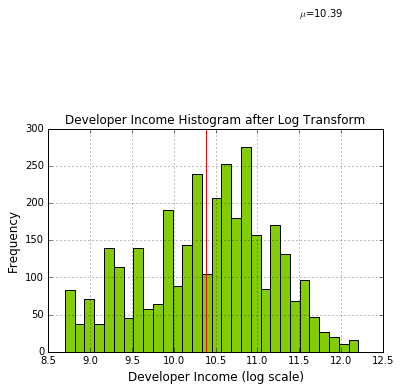

In [23]:
income_log_mean = np.round(np.mean(df_survey_fcc['Income_log']), 2)

fig, ax = plt.subplots()
df_survey_fcc['Income_log'].hist(bins=30, color='#84cc08')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Thus we can clearly see that the original developer income distribution that was right skewed in
is more Gaussian or normal-like after applying the log transform.

### Box-Cox Transform
Let’s now look at the Box-Cox transform, another popular function belonging to the power transform family of functions. This function has a prerequisite that the numeric values to be transformed must be positive (similar to what log transform expects). In case they are negative, shifting using a constant value helps. Mathematically, the Box-Cox transform function can be defined as,

$$y = f(x,\lambda) = x^\lambda = \begin{cases}
    \frac{x^\lambda-1}{\lambda}, & \text{for $\lambda>0$}.\\
    \log(x), & \text{for $\lambda=0$}
  \end{cases} $$
  
Such that the resulted transformed output $y$ is a function of input $x$ and transformation parameter $\lambda$ such that when $\lambda=0$, the resultant transform is the natural log transform, which we discussed earlier. The optimal value of $\lambda$ is usually determined using a maximum likelihood or log-likelihood estimation. Let’s apply the Box-Cox transform on our developer income feature. To do this, first we get the optimal lambda value from the data distribution by removing the non-null values using the following code.

In [24]:
# get optimal lambda value from non null income values
income = np.array(df_survey_fcc['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.15398905829120108


In [25]:
df_survey_fcc['Income_boxcox_lambda_0'] = spstats.boxcox((1+df_survey_fcc['Income']), lmbda=0)
df_survey_fcc['Income_boxcox_lambda_opt'] = spstats.boxcox((1+df_survey_fcc['Income']), lmbda=opt_lambda)
df_survey_fcc[['ID.x', 'Age', 'Income', 'Income_log','Income_boxcox_lambda_0','Income_boxcox_lambda_opt']].iloc[4:9]

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:1030: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,18.298242
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,26.709137
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,25.587633
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,26.709137
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,30.449119


Now plot the data distribution for the Box-Cox transformed developer values with optimal lambda

KeyError: 'Income_log_lambda_opt'

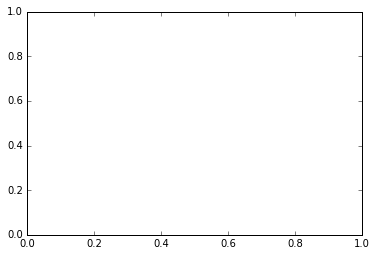

In [26]:
income_boxcox_mean = np.round(np.mean(df_survey_fcc['Income_boxcox_lambda_opt']), 2)
fig, ax = plt.subplots()
df_survey_fcc['Income__lambda_opt'].hist(bins=30, color='#84cc08')
